<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/2d_compare_ALL_top_bottom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

# Abordagem  para multiplos times

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexFormatter
import matplotlib.patches as patches

# GLOBAL CONFIG
cube_range = (0, 13)
elc_global_scale = (10, -60)
mag_global_scale = (-20, -80)

def plane(url_of_csv_file: str, 
          signal_frequency: str, 
          probe_type: str, 
          pcb_side: str) -> dict:
    return {
        'url_of_csv_file': url_of_csv_file,
        'signal_frequency': signal_frequency,
        'probe_type': probe_type,
        'pcb_side': pcb_side
    }


def team(team_members: list, 
         board_number: int, 
         planes: list) -> dict:
    return {
        'team_members': team_members,
        'board_number': board_number,
        'planes': planes
    }


def csv_to_numpy(url: str, names:list) -> np.ndarray:
    csv_file = pd.read_csv(url, names=names)
    values = csv_file[csv_file.columns].values
    if np.min(values) < 0:
        return values
    else:
        return -abs(values)

    
def plot(teams):
    
    subplot_ncols = len(teams[0]['planes'])
    subplot_nrows = len(teams)
    col_pixel_size = 20/subplot_ncols
    row_pixel_size = col_pixel_size

    fig = plt.figure(figsize = ((subplot_ncols)*col_pixel_size, (subplot_nrows)*row_pixel_size))
    
    columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
    rows_name = np.arange(1,14,1).tolist()
    xticks_formatter = IndexFormatter(columns_name)
    yticks_formatter = IndexFormatter(rows_name)
    
    ax = None

    for row, team in enumerate(teams):
        for col, plane in enumerate(team['planes']):
            index = 1 + col + subplot_ncols * row
            
            ax = fig.add_subplot(subplot_nrows, subplot_ncols, index, sharex=ax, sharey=ax)

            if team['team_members'][0] is 'Ian':
                data_from_csv = csv_to_numpy(plane['url_of_csv_file'], rows_name[:-1])
                data_from_csv = np.vstack((data_from_csv, data_from_csv[-1,:]))
                data_from_csv = np.hstack((data_from_csv, data_from_csv[:,[-1]]))
                d = -.5
            else:
                data_from_csv = csv_to_numpy(plane['url_of_csv_file'], rows_name)
                d = 0
            
            
            if team['board_number'] == 0:
                chanfro = (0,0,0,0)
            elif team['board_number'] == 1:
                chanfro = (5.5,2,1,9)
            elif team['board_number'] == 2:
                chanfro = (5.5,1,1,9)
            elif team['board_number'] == 3:
                chanfro = (1,5.5,9,1)
                
            if plane['pcb_side'] is 'bottom':
                data_from_csv = np.flip(data_from_csv, 1)
                
            if plane['probe_type'] is 'MAG':
                global_scale = mag_global_scale
            else:
                global_scale = elc_global_scale

            ax.imshow(
                data_from_csv,
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = global_scale[0],
                vmin = global_scale[1]
            )
            
            title = f"Placa {team['board_number']} - {plane['probe_type']} - {plane['signal_frequency']} - {plane['pcb_side']} , {team['team_members'][0]}."
            ax.set_title(title, fontsize=8, color='white')
            ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
            ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])
            ax.set_xticks(np.arange(cube_range[0], cube_range[1], 1)) 
            ax.set_yticks(np.arange(cube_range[0], cube_range[1], 1)) 
            ax.xaxis.set_major_formatter(xticks_formatter)
            ax.yaxis.set_major_formatter(yticks_formatter)
            ax.grid(True)
            ax.set_ylim(ax.get_ylim()[::-1])
#             ax.set_aspect('auto')
                      
            
            chanfro_rect = patches.Rectangle(np.array(chanfro[:2])+np.array((d,d)),chanfro[2],chanfro[3],linewidth=3,edgecolor='w',facecolor='none')
            ax.add_patch(chanfro_rect)
            borda_da_placa = patches.Rectangle((1+d,1+d),10,10,linewidth=3,edgecolor='w',facecolor='none')
            ax.add_patch(borda_da_placa)

            trilha_points = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
            trilha_points_deslocado = [[x+d,y+d] for x,y in trilha_points]
            trilha = patches.Polygon(np.array(trilha_points_deslocado),lw=3, ec='r',fc='none')
            ax.add_patch(trilha)

            fig.subplots_adjust(wspace=0, hspace=0.2)
            


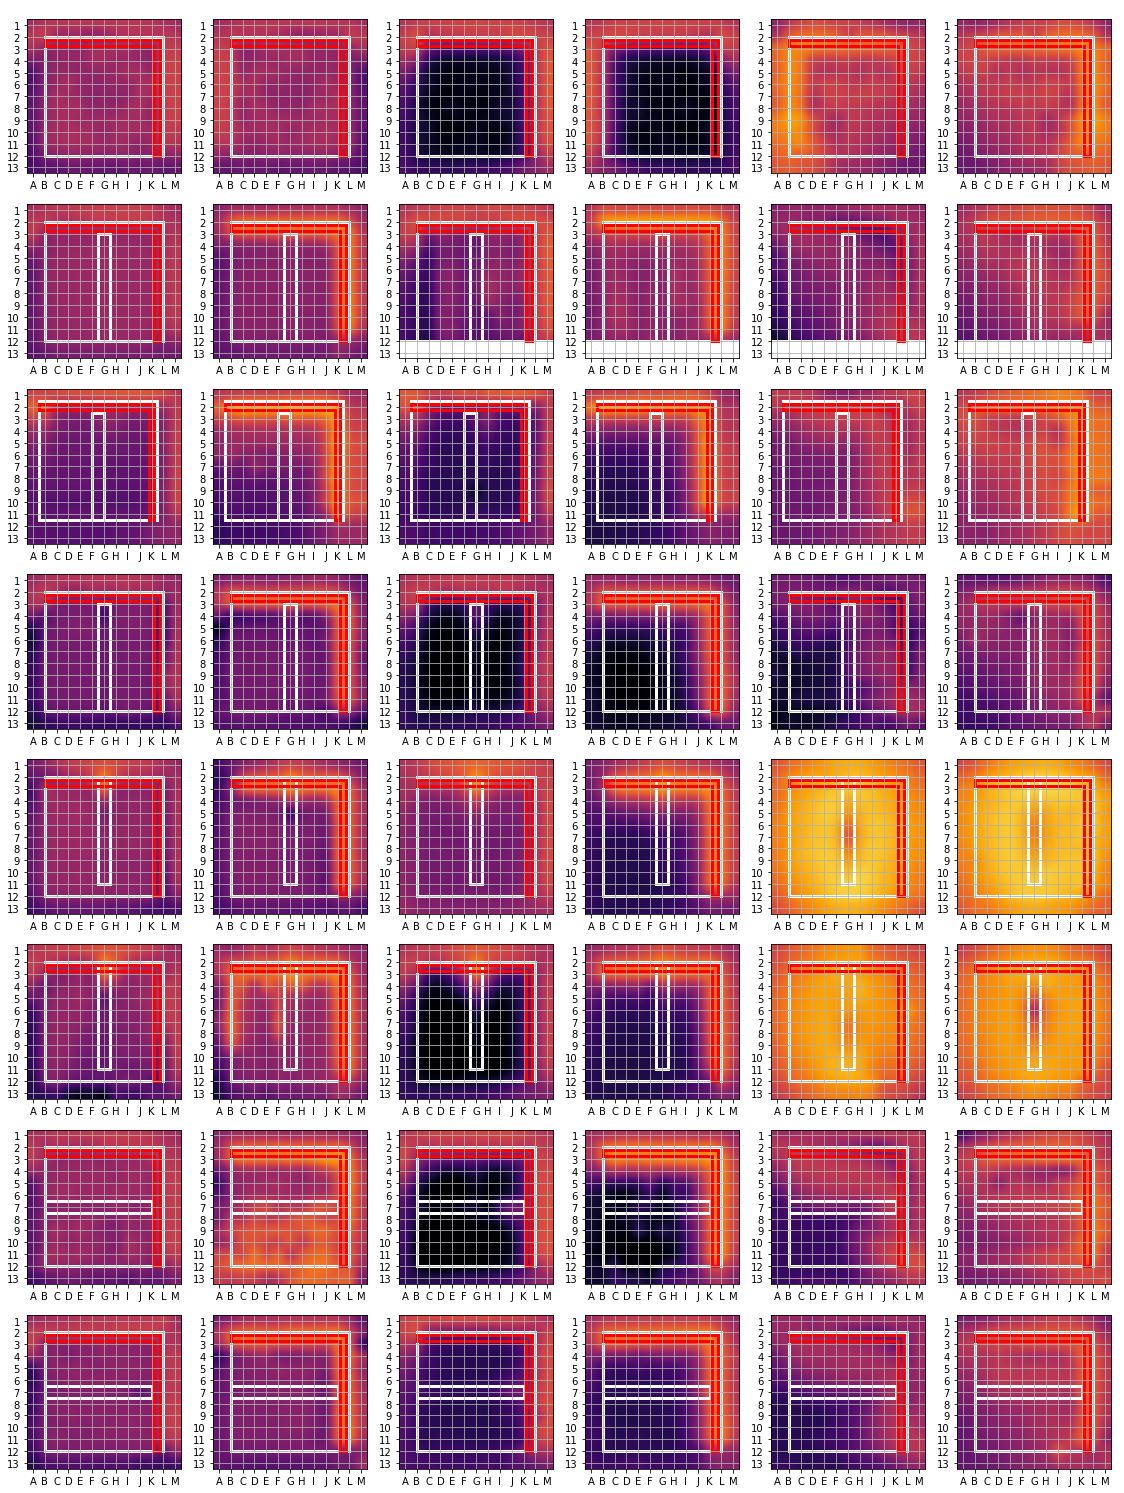

In [402]:
teams = []

#---------------------------------------------------------------------------------------------------------------------------------------
# Luiz e Matheus:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_500k.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_500k.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_variando_trilha_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_variando_trilha_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Luiz', 'Matheus'],
    board_number=0,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Jeferson e Maria:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/jeferson_maria/medidas_L_15MHZ_01-terra_v3.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/jeferson_maria/medidas_L_15MHZ_02-L_v3.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/jeferson_maria/medidas_L_200KHZ_01-terra.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/jeferson_maria/medidas_L_200KHZ_02-L.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/jeferson_maria/medidas_L_magnetico_15MHZ_01-terra.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/jeferson_maria/medidas_L_magnetico_15MHZ_02-L.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Jeferson', 'Maria'],
    board_number=1,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Ian e Cleisson:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_baixo_Z.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_cima_Z.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%20500k_baixo_Z.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%20500k_cima_Z.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_baixo_H.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_cima_H.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Ian', 'Cleisson'],
    board_number=1,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Alex e Jhonatan:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/alex_jhonatan/1%20-%2015M_baixo_Z.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/alex_jhonatan/1%20-%2015M_cima_Z.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/alex_jhonatan/1%20-%20200k_baixo_Z.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/alex_jhonatan/1%20-%20200k_cima_Z.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/alex_jhonatan/1%20-%2015M_baixo_H.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/alex_jhonatan/1%20-%2015M_cima_H.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Alex', 'Jhonatan'],
    board_number=1,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Lucas e João:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Lucas', 'João'],
    board_number=2,
    planes=planes
))


#---------------------------------------------------------------------------------------------------------------------------------------
# Federico e Gustavo:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_Alta_Impedancia_Referencia.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_Alta_Impedancia_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/200k_Alta_Impedancia_Referencia.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/200k_Alta_Impedancia_Trilha.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_H_Field_Referencia.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_H_Field_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Federico', 'Gustavo'],
    board_number=2,
    planes=planes
))


#---------------------------------------------------------------------------------------------------------------------------------------
# Wellington e Gabriel:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_ref_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_trilha_L_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_ref_500kHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_trilha_L_500kHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_mag_ref_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_mag_trilha_L_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Wellington', 'Gabriel'],
    board_number=3,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Botelho:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_Alta_Impedancia_Plano.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_Alta_Impedancia_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%20200k_Alta_Impedancia_Plano.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%20200k_Alta_Impedancia_Trilha.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_H_Field_Plano.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_H_Field_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Botelho'],
    board_number=3,
    planes=planes
))

plot(teams)

In [317]:
a = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
print(a)

ncol = len(a[0])
nrow = len(a)

for row in range(nrow):
    for col in range(ncol):
#         index = 1 +col +row*ncol
        index = 1 +row +nrow*col
        a[row][col] = index 
        
print(np.matrix(a))
print(np.matrix(a).shape)
print(ncol)
print(nrow)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]
 [ 6 12]]
(6, 2)
2
6
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]
 [ 6 12]]
(6, 2)
2
6
